In [1]:
import pandas as pd
from sodapy import Socrata
from api_keys import my_app_token
from api_keys import chicago_password
from api_keys import chicago_username
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Access ride share data 2022
client = Socrata("data.cityofchicago.org",
                my_app_token,
                username=chicago_username,
                password=chicago_password)

ride_results = client.get("2tdj-ffvb", limit=2000000)  #Ride share has 69M records for 2022 w an avg of 5.75M per month

# Convert to pandas DataFrame
ride_results_df = pd.DataFrame.from_records(ride_results)

ride_results_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,fare,tip,additional_charges,trip_total,...,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,pickup_census_tract,dropoff_census_tract,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,0023918a32baa84c59a60ec6acd38ef8d8876a55,2022-01-01T00:00:00.000,2022-01-01T00:45:00.000,2123,27.8011,8,37.5,0,7.91,45.41,...,1,41.899602111,-87.6333080367,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN,NaN,NaN,NaN,NaN
1,0031f13d0144700e8132ec4ced74bf91b604bafd,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,308,1.3617,7,5,0,3.75,8.75,...,1,41.922082541,-87.6341560931,"{'type': 'Point', 'coordinates': [-87.63415609...",17031071400,17031080400,8,41.9074128162,-87.6409015248,"{'type': 'Point', 'coordinates': [-87.64090152..."
2,003b7701b5658afe3415169d091130f15c2d8434,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,830,3.59,8,10,0,1.02,11.02,...,1,41.9074919303,-87.6357600901,"{'type': 'Point', 'coordinates': [-87.63576009...",17031080300,17031221400,22,41.9208017043,-87.6945323419,"{'type': 'Point', 'coordinates': [-87.69453234..."
3,003c710f7464bf348349ec4436fea275b97300bd,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,862,4.7492,22,10,0,3.74,13.74,...,1,41.9159097884,-87.6838259399,"{'type': 'Point', 'coordinates': [-87.68382593...",17031222200,17031081800,8,41.8932163595,-87.6378442095,"{'type': 'Point', 'coordinates': [-87.63784420..."
4,0066f1154bb7dc467b2d8ce59e8def475a428557,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,471,0.7196,8,2.5,0,2.36,4.859999999999999,...,1,41.8920726347,-87.6288741572,"{'type': 'Point', 'coordinates': [-87.62887415...",17031081600,17031081800,8,41.8932163595,-87.6378442095,"{'type': 'Point', 'coordinates': [-87.63784420..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,ff094e0eb791587ff889d96f387c06bc5b68561e,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,556,1.8374,28,5,0,2.36,7.359999999999999,...,1,41.8679024175,-87.6429586652,"{'type': 'Point', 'coordinates': [-87.64295866...",17031841900,17031320600,32,41.8706073724,-87.6221729369,"{'type': 'Point', 'coordinates': [-87.62217293..."
1999996,ff1ef1446b4c3db0774a17b1f860ce43bb2fabc6,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,604,6.76,32,12.5,0,1.02,13.52,...,1,41.8788655841,-87.6251921424,"{'type': 'Point', 'coordinates': [-87.62519214...",NaN,NaN,21,41.9386661962,-87.7112105933,"{'type': 'Point', 'coordinates': [-87.71121059..."
1999997,ff2ef12bbe40a9d2ce95efc349edcfa93dd43b02,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,729,2.25,8,10,0,1.02,11.02,...,1,41.8983317935,-87.6207628651,"{'type': 'Point', 'coordinates': [-87.62076286...",17031081300,17031833000,28,41.8852813201,-87.6572331997,"{'type': 'Point', 'coordinates': [-87.65723319..."
1999998,ff2f30d563e1577188c7e0d7654f8ca4691830ec,2022-01-15T10:00:00.000,2022-01-15T10:45:00.000,3211,36.9491,77,40,8,11.2,59.2,...,1,41.9943810196,-87.672538401,"{'type': 'Point', 'coordinates': [-87.67253840...",17031030300,NaN,NaN,NaN,NaN,NaN


In [3]:
#Formatting Step
drop = ["pickup_census_tract",
        "dropoff_census_tract",
        "shared_trip_authorized",
        "trips_pooled",
        "pickup_centroid_location",
        "dropoff_centroid_location"]

ride_df = ride_results_df.drop(drop, axis=1)
ride_df = ride_df.dropna(how='any')
ride_df['pickup_centroid_latitude'] = ride_df['pickup_centroid_latitude'].astype(float)
ride_df['pickup_centroid_longitude'] = ride_df['pickup_centroid_longitude'].astype(float)
ride_df['dropoff_centroid_latitude'] = ride_df['dropoff_centroid_latitude'].astype(float)
ride_df['dropoff_centroid_longitude'] = ride_df['dropoff_centroid_longitude'].astype(float)

ride_df.rename(columns={'pickup_centroid_latitude': 'pickup_lat',
                         'pickup_centroid_longitude': 'pickup_lon',
                         'dropoff_centroid_latitude': 'dropoff_lat',
                         'dropoff_centroid_longitude': 'dropoff_lon'
                         }, inplace=True)

ride_df


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,fare,tip,additional_charges,trip_total,pickup_lat,pickup_lon,dropoff_community_area,dropoff_lat,dropoff_lon
1,0031f13d0144700e8132ec4ced74bf91b604bafd,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,308,1.3617,7,5,0,3.75,8.75,41.922083,-87.634156,8,41.907413,-87.640902
2,003b7701b5658afe3415169d091130f15c2d8434,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,830,3.59,8,10,0,1.02,11.02,41.907492,-87.635760,22,41.920802,-87.694532
3,003c710f7464bf348349ec4436fea275b97300bd,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,862,4.7492,22,10,0,3.74,13.74,41.915910,-87.683826,8,41.893216,-87.637844
4,0066f1154bb7dc467b2d8ce59e8def475a428557,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,471,0.7196,8,2.5,0,2.36,4.859999999999999,41.892073,-87.628874,8,41.893216,-87.637844
5,00ac5c7ec5b5540a83e5f60cd19f721ec46256f2,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,1057,1.0492,32,10,0,2.87,12.870000000000001,41.884987,-87.620993,32,41.880994,-87.632746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999993,fec4fb5d060c18a38a24cfd66ea0eed6498c9177,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,311,1.4563,3,5,0,2.36,7.359999999999999,41.965812,-87.655879,5,41.947792,-87.683835
1999994,fed2421486d62353b3ecbddbe893a49f4c3cfef1,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,456,1.6984,33,7.5,3,2.36,12.86,41.859350,-87.617358,32,41.884987,-87.620993
1999995,ff094e0eb791587ff889d96f387c06bc5b68561e,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,556,1.8374,28,5,0,2.36,7.359999999999999,41.867902,-87.642959,32,41.870607,-87.622173
1999996,ff1ef1446b4c3db0774a17b1f860ce43bb2fabc6,2022-01-15T10:00:00.000,2022-01-15T10:15:00.000,604,6.76,32,12.5,0,1.02,13.52,41.878866,-87.625192,21,41.938666,-87.711211


In [4]:
#Convert timestamp columns to data type = datetime
ride_df['trip_start_timestamp'] = pd.to_datetime(ride_df['trip_start_timestamp'])
ride_df['trip_end_timestamp'] = pd.to_datetime(ride_df['trip_end_timestamp'])

#split out timestamp into new columns date, time
ride_df['start_date'] = ride_df['trip_start_timestamp'].dt.date
ride_df['start_time'] = ride_df['trip_start_timestamp'].dt.time
ride_df['end_date'] = ride_df['trip_end_timestamp'].dt.date
ride_df['end_time'] = ride_df['trip_end_timestamp'].dt.time
ride_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,fare,tip,additional_charges,trip_total,pickup_lat,pickup_lon,dropoff_community_area,dropoff_lat,dropoff_lon,start_date,start_time,end_date,end_time
1,0031f13d0144700e8132ec4ced74bf91b604bafd,2022-01-01 00:00:00,2022-01-01 00:00:00,308,1.3617,7,5,0,3.75,8.75,41.922083,-87.634156,8,41.907413,-87.640902,2022-01-01,00:00:00,2022-01-01,00:00:00
2,003b7701b5658afe3415169d091130f15c2d8434,2022-01-01 00:00:00,2022-01-01 00:15:00,830,3.59,8,10,0,1.02,11.02,41.907492,-87.635760,22,41.920802,-87.694532,2022-01-01,00:00:00,2022-01-01,00:15:00
3,003c710f7464bf348349ec4436fea275b97300bd,2022-01-01 00:00:00,2022-01-01 00:15:00,862,4.7492,22,10,0,3.74,13.74,41.915910,-87.683826,8,41.893216,-87.637844,2022-01-01,00:00:00,2022-01-01,00:15:00
4,0066f1154bb7dc467b2d8ce59e8def475a428557,2022-01-01 00:00:00,2022-01-01 00:00:00,471,0.7196,8,2.5,0,2.36,4.859999999999999,41.892073,-87.628874,8,41.893216,-87.637844,2022-01-01,00:00:00,2022-01-01,00:00:00
5,00ac5c7ec5b5540a83e5f60cd19f721ec46256f2,2022-01-01 00:00:00,2022-01-01 00:15:00,1057,1.0492,32,10,0,2.87,12.870000000000001,41.884987,-87.620993,32,41.880994,-87.632746,2022-01-01,00:00:00,2022-01-01,00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999993,fec4fb5d060c18a38a24cfd66ea0eed6498c9177,2022-01-15 10:00:00,2022-01-15 10:15:00,311,1.4563,3,5,0,2.36,7.359999999999999,41.965812,-87.655879,5,41.947792,-87.683835,2022-01-15,10:00:00,2022-01-15,10:15:00
1999994,fed2421486d62353b3ecbddbe893a49f4c3cfef1,2022-01-15 10:00:00,2022-01-15 10:15:00,456,1.6984,33,7.5,3,2.36,12.86,41.859350,-87.617358,32,41.884987,-87.620993,2022-01-15,10:00:00,2022-01-15,10:15:00
1999995,ff094e0eb791587ff889d96f387c06bc5b68561e,2022-01-15 10:00:00,2022-01-15 10:15:00,556,1.8374,28,5,0,2.36,7.359999999999999,41.867902,-87.642959,32,41.870607,-87.622173,2022-01-15,10:00:00,2022-01-15,10:15:00
1999996,ff1ef1446b4c3db0774a17b1f860ce43bb2fabc6,2022-01-15 10:00:00,2022-01-15 10:15:00,604,6.76,32,12.5,0,1.02,13.52,41.878866,-87.625192,21,41.938666,-87.711211,2022-01-15,10:00:00,2022-01-15,10:15:00


In [5]:
#Access taxi rides 2022
taxi_results = client.get("npd7-ywjz", limit=2000000)

# Convert to pandas DataFrame
taxi_results_df = pd.DataFrame.from_records(taxi_results)

taxi_results_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,...,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,pickup_census_tract,dropoff_census_tract
0,bcfa19f2539021c054809d4c3993d226996ae095,368ce5511598af2cc07efdb68067d381174fdac1d47a28...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,152,0.1,3.75,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2aba69ff015f9ea8e7bff43cab7eddb228f34a12,449fa4909552757130d09d98ebc7770e2dd94579036b0e...,2022-01-01T00:00:00.000,2022-01-01T00:30:00.000,2360,17.44,47.75,0,0,5,...,8,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN,NaN,NaN,NaN,NaN
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,536,4.83,14.75,0,0,0,...,22,41.92276062,-87.699155343,"{'type': 'Point', 'coordinates': [-87.69915534...",28,41.874005383,-87.66351755,"{'type': 'Point', 'coordinates': [-87.66351754...",NaN,NaN
3,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,897,2.07,9.75,0,0,1.5,...,32,41.878865584,-87.625192142,"{'type': 'Point', 'coordinates': [-87.62519214...",8,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
4,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01T00:00:00.000,2022-01-01T00:30:00.000,2200,2.48,9.36,2.14,0,0,...,32,41.878865584,-87.625192142,"{'type': 'Point', 'coordinates': [-87.62519214...",8,41.899602111,-87.633308037,"{'type': 'Point', 'coordinates': [-87.63330803...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,518e3b3c3f90619542869a8c27650670bb089ed1,76195767851c0e4807795915d7a0579a1c625c2eae552b...,2022-05-16T11:30:00.000,2022-05-16T11:45:00.000,1080,11.3,28.75,0,0,0,...,16,41.953582125,-87.72345239,"{'type': 'Point', 'coordinates': [-87.72345239...",38,41.812948939,-87.617859676,"{'type': 'Point', 'coordinates': [-87.61785967...",NaN,NaN
1999996,52330a10993895fb0d287b3e06de389a7b7fcc97,f6ea1f58e87fd583890861ab62c8f06f47dd09f494e801...,2022-05-16T11:30:00.000,2022-05-16T11:45:00.000,540,0,8,3,0,0,...,32,41.880994471,-87.632746489,"{'type': 'Point', 'coordinates': [-87.63274648...",8,41.89503345,-87.619710672,"{'type': 'Point', 'coordinates': [-87.61971067...",17031081401,17031839100
1999997,5b12145d8c66bbe39e0c1a516d1ac07c31ee30e3,91d5288487e87c5917b813ba6f75ab1c3a9749af906a2d...,2022-05-16T11:30:00.000,2022-05-16T11:45:00.000,586,2.4,10,0,0,1,...,33,41.859349715,-87.617358006,"{'type': 'Point', 'coordinates': [-87.61735800...",8,41.892507781,-87.626214906,"{'type': 'Point', 'coordinates': [-87.62621490...",17031081500,17031330100
1999998,5971cc58c38479bb38e887761cf4bd1a4ab91de9,4de82fc17cb23f745931085fbbb3b4f920550cda576979...,2022-05-16T11:30:00.000,2022-05-16T12:00:00.000,2082,18.95,47.25,8.06,0,6,...,32,41.870607372,-87.622172937,"{'type': 'Point', 'coordinates': [-87.62217293...",76,41.97907082,-87.903039661,"{'type': 'Point', 'coordinates': [-87.90303966...",17031980000,17031320600


In [6]:
#Format Step
drop = ["pickup_census_tract",
        "dropoff_census_tract",
        "pickup_centroid_location",
        "dropoff_centroid_location"]

taxi_df = taxi_results_df.drop(drop, axis=1)
taxi_df = taxi_df.dropna(how = 'any')
taxi_df['pickup_centroid_latitude'] = taxi_df['pickup_centroid_latitude'].astype(float)
taxi_df['pickup_centroid_longitude'] = taxi_df['pickup_centroid_longitude'].astype(float)
taxi_df['dropoff_centroid_latitude'] = taxi_df['dropoff_centroid_latitude'].astype(float)
taxi_df['dropoff_centroid_longitude'] = taxi_df['dropoff_centroid_longitude'].astype(float)

taxi_df.rename(columns={'pickup_centroid_latitude': 'pickup_lat',
                         'pickup_centroid_longitude': 'pickup_lon',
                         'dropoff_centroid_latitude': 'dropoff_lat',
                         'dropoff_centroid_longitude': 'dropoff_lon'
                         }, inplace=True)

taxi_df


,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type,company,dropoff_community_area,dropoff_lat,dropoff_lon,pickup_community_area,pickup_lat,pickup_lon
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,536,4.83,14.75,0,0,0,14.75,Cash,Globe Taxi,22,41.922761,-87.699155,28,41.874005,-87.663518
3,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01T00:00:00.000,2022-01-01T00:15:00.000,897,2.07,9.75,0,0,1.5,11.25,Cash,Sun Taxi,32,41.878866,-87.625192,8,41.899602,-87.633308
4,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01T00:00:00.000,2022-01-01T00:30:00.000,2200,2.48,9.36,2.14,0,0,11.5,Mobile,Chicago Independents,32,41.878866,-87.625192,8,41.899602,-87.633308
6,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,0,0,3.25,0,0,0,3.25,Cash,Taxi Affiliation Services,33,41.857184,-87.620335,33,41.857184,-87.620335
7,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01T00:00:00.000,2022-01-01T00:00:00.000,33,0.17,63.27,0,0,0,63.27,Cash,Flash Cab,3,41.965812,-87.655879,3,41.965812,-87.655879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,518e3b3c3f90619542869a8c27650670bb089ed1,76195767851c0e4807795915d7a0579a1c625c2eae552b...,2022-05-16T11:30:00.000,2022-05-16T11:45:00.000,1080,11.3,28.75,0,0,0,28.75,Unknown,Taxi Affiliation Services,16,41.953582,-87.723452,38,41.812949,-87.617860
1999996,52330a10993895fb0d287b3e06de389a7b7fcc97,f6ea1f58e87fd583890861ab62c8f06f47dd09f494e801...,2022-05-16T11:30:00.000,2022-05-16T11:45:00.000,540,0,8,3,0,0,11,Credit Card,Taxi Affiliation Services,32,41.880994,-87.632746,8,41.895033,-87.619711
1999997,5b12145d8c66bbe39e0c1a516d1ac07c31ee30e3,91d5288487e87c5917b813ba6f75ab1c3a9749af906a2d...,2022-05-16T11:30:00.000,2022-05-16T11:45:00.000,586,2.4,10,0,0,1,11,Cash,Flash Cab,33,41.859350,-87.617358,8,41.892508,-87.626215
1999998,5971cc58c38479bb38e887761cf4bd1a4ab91de9,4de82fc17cb23f745931085fbbb3b4f920550cda576979...,2022-05-16T11:30:00.000,2022-05-16T12:00:00.000,2082,18.95,47.25,8.06,0,6,61.81,Credit Card,Star North Taxi Management Llc,32,41.870607,-87.622173,76,41.979071,-87.903040


In [7]:
#Convert timestamp columns to data type = datetime
taxi_df['trip_start_timestamp'] = pd.to_datetime(taxi_df['trip_start_timestamp'])
taxi_df['trip_end_timestamp'] = pd.to_datetime(taxi_df['trip_end_timestamp'])

#split out timestamp into new columns date, time
taxi_df['start_date'] = taxi_df['trip_start_timestamp'].dt.date
taxi_df['start_time'] = taxi_df['trip_start_timestamp'].dt.time
taxi_df['end_date'] = taxi_df['trip_end_timestamp'].dt.date
taxi_df['end_time'] = taxi_df['trip_end_timestamp'].dt.time
taxi_df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,...,dropoff_community_area,dropoff_lat,dropoff_lon,pickup_community_area,pickup_lat,pickup_lon,start_date,start_time,end_date,end_time
2,54d812a0b88f8f9707825261014b3563a0a60ace,f98ae5e71fdda8806710af321dce58002146886c013f41...,2022-01-01 00:00:00,2022-01-01 00:00:00,536,4.83,14.75,0,0,0,...,22,41.922761,-87.699155,28,41.874005,-87.663518,2022-01-01,00:00:00,2022-01-01,00:00:00
3,7125b9e03a0f16c2dfb5eaf73ed057dc51eb68ef,8eca35a570101ad24c638f1f43eecce9d0cb7843e13a75...,2022-01-01 00:00:00,2022-01-01 00:15:00,897,2.07,9.75,0,0,1.5,...,32,41.878866,-87.625192,8,41.899602,-87.633308,2022-01-01,00:00:00,2022-01-01,00:15:00
4,f1a650ee419b4e52d766432e6f86eca3457bfb37,e2d8418fcdb061eee0a4318fba0a6a1200aaff0143feb0...,2022-01-01 00:00:00,2022-01-01 00:30:00,2200,2.48,9.36,2.14,0,0,...,32,41.878866,-87.625192,8,41.899602,-87.633308,2022-01-01,00:00:00,2022-01-01,00:30:00
6,058322b4ecd94483ab01630b6a07da6221fbac7f,c9867d006415cbc16529555f98cdeb44cb53aeaf1d9ae7...,2022-01-01 00:00:00,2022-01-01 00:00:00,0,0,3.25,0,0,0,...,33,41.857184,-87.620335,33,41.857184,-87.620335,2022-01-01,00:00:00,2022-01-01,00:00:00
7,0f0c856e620e6b4dfd2bb1e921d966dd179eeca1,b21050ab3ad3d0972fd6378f6bf4d0251a8a7af42e6e0e...,2022-01-01 00:00:00,2022-01-01 00:00:00,33,0.17,63.27,0,0,0,...,3,41.965812,-87.655879,3,41.965812,-87.655879,2022-01-01,00:00:00,2022-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,518e3b3c3f90619542869a8c27650670bb089ed1,76195767851c0e4807795915d7a0579a1c625c2eae552b...,2022-05-16 11:30:00,2022-05-16 11:45:00,1080,11.3,28.75,0,0,0,...,16,41.953582,-87.723452,38,41.812949,-87.617860,2022-05-16,11:30:00,2022-05-16,11:45:00
1999996,52330a10993895fb0d287b3e06de389a7b7fcc97,f6ea1f58e87fd583890861ab62c8f06f47dd09f494e801...,2022-05-16 11:30:00,2022-05-16 11:45:00,540,0,8,3,0,0,...,32,41.880994,-87.632746,8,41.895033,-87.619711,2022-05-16,11:30:00,2022-05-16,11:45:00
1999997,5b12145d8c66bbe39e0c1a516d1ac07c31ee30e3,91d5288487e87c5917b813ba6f75ab1c3a9749af906a2d...,2022-05-16 11:30:00,2022-05-16 11:45:00,586,2.4,10,0,0,1,...,33,41.859350,-87.617358,8,41.892508,-87.626215,2022-05-16,11:30:00,2022-05-16,11:45:00
1999998,5971cc58c38479bb38e887761cf4bd1a4ab91de9,4de82fc17cb23f745931085fbbb3b4f920550cda576979...,2022-05-16 11:30:00,2022-05-16 12:00:00,2082,18.95,47.25,8.06,0,6,...,32,41.870607,-87.622173,76,41.979071,-87.903040,2022-05-16,11:30:00,2022-05-16,12:00:00


In [8]:
#Analyze the fare amts between ride share and taxi

#Convert fare data type from object to numeric
ride_df['fare'] = pd.to_numeric(ride_df['fare'])
taxi_df['fare'] = pd.to_numeric(taxi_df['fare'])

#Convert end_date to numeric for both services
ride_df['end_date'] = pd.to_datetime(ride_df['end_date'])
taxi_df['end_date'] = pd.to_datetime(taxi_df['end_date'])

#Set end_date as the index for each df
ride_df.set_index('end_date', inplace=True)
taxi_df.set_index('end_date', inplace=True)

#calculate mean fair amt per month for each service
ride_fare_mean = ride_df.resample('M')['fare'].mean()
taxi_fare_mean = taxi_df.resample('M')['fare'].mean()

#create df for plotting
fare_df = pd.DataFrame(
    {
        'Ride Share': ride_fare_mean,
        'Taxi': taxi_fare_mean
    })

fare_df

,Ride Share,Taxi
end_date,,
2022-01-31,13.221505,17.983121
2022-02-28,NaN,17.870095
2022-03-31,NaN,18.297960
2022-04-30,NaN,19.659111
2022-05-31,NaN,20.542197


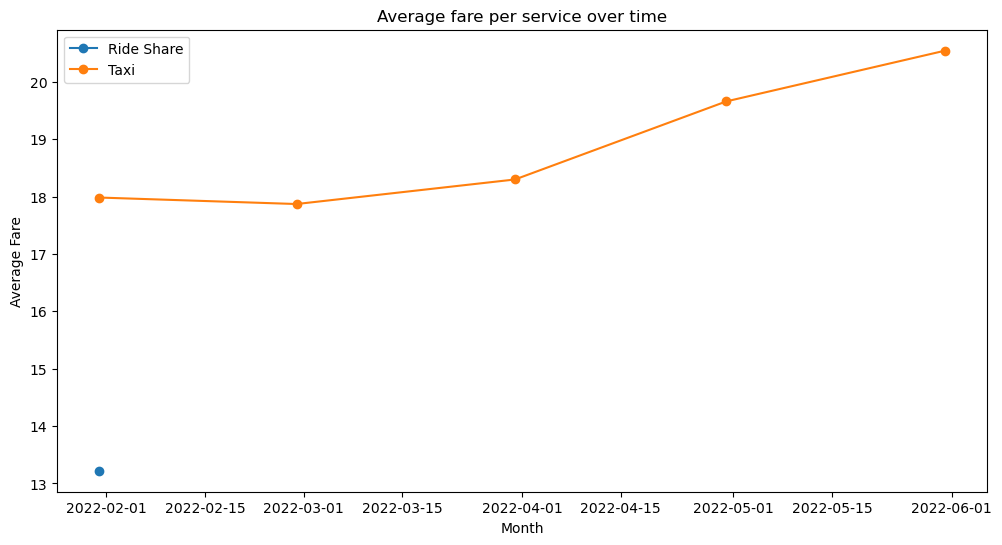

In [9]:
#Plot the findings
plt.figure(figsize = (12,6))

plt.plot(fare_df.index, fare_df['Ride Share'], label = 'Ride Share', marker = 'o')
plt.plot(fare_df.index, fare_df['Taxi'], label = 'Taxi', marker = 'o')

plt.title('Average fare per service over time')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.legend()

plt.show()

In [10]:
#Comparison off
fare_df

,Ride Share,Taxi
end_date,,
2022-01-31,13.221505,17.983121
2022-02-28,NaN,17.870095
2022-03-31,NaN,18.297960
2022-04-30,NaN,19.659111
2022-05-31,NaN,20.542197


In [12]:
print(ride_df.index.min())
print(ride_df.index.max())

2022-01-01 00:00:00
2022-01-15 00:00:00


In [13]:
print(taxi_df.index.min())
print(taxi_df.index.max())

2022-01-01 00:00:00
2022-05-16 00:00:00
